# Basic Error Correction Codes

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')    # Use dark background for plots

import qibo
assert qibo.__version__ >= "0.2.20", "This script requires qibo version 0.2.20 or higher."
from qibo import Circuit
from qibo.gates import *

from qibo.ui import plot_circuit, plot_density_hist, visualize_state


custom_style = {                    # Define a custom style for the circuit plot
    "facecolor" : "#000000",
    "edgecolor" : "#ffffff",
    "linecolor" : "#ffffff",
    "textcolor" : "#ffffff",
    "fillcolor" : "#c41b1b",
    "gatecolor" : "#9000ff",
    "controlcolor" : "#360000"
}

## Bit Flip Error Correction Code

Most basic 3 qubit error correction code with preparation stage, error introduction stage and correction.

### Case of single bit flip on first qubit

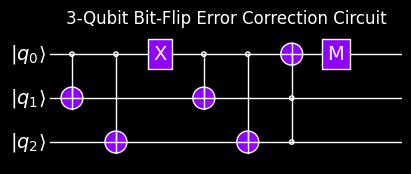

In [15]:
def bit_flip_circuit(error_position: int = None) -> Circuit:
    """Creates a 3-qubit bit-flip error correction circuit."""

    circuit = Circuit(3)

    # initial state preparation

    circuit.add(CNOT(0, 1))
    circuit.add(CNOT(0, 2))
    
    # Introduce an error if specified

    if error_position is not None:
        if error_position not in [0, 1, 2]:
            raise ValueError("error_position must be 0, 1, or 2")
        # Introduce a bit-flip error (X gate) on the specified qubit
        circuit.add(X(error_position))

    # Error detection and correction
     
    circuit.add(CNOT(0, 1))
    circuit.add(CNOT(0, 2))
    circuit.add(TOFFOLI(1,2,0)) 

    circuit.add(M(0)) # Measure the first qubit to check for errors

    return circuit

bit_flip_circ = bit_flip_circuit( error_position = 0 )  # Create a circuit with an error on qubit 1
plot_circuit(bit_flip_circ, style=custom_style)  # Plot the circuit with custom style
plt.title("3-Qubit Bit-Flip Error Correction Circuit")
plt.tight_layout()
plt.show()

Simulation:

(<Axes: xlabel='States', ylabel='Probabilities'>,
 <Figure size 600x500 with 1 Axes>)

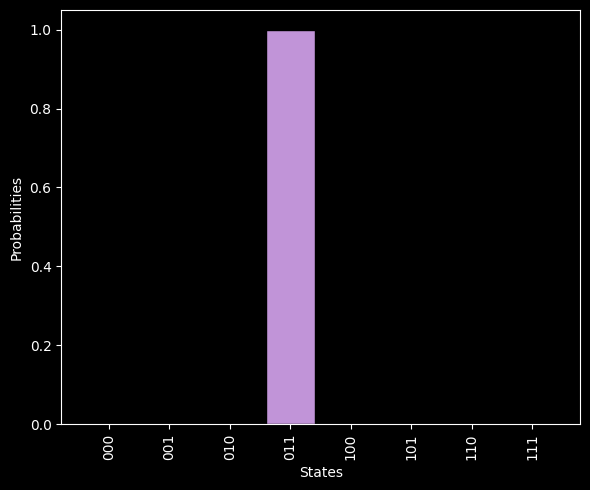

In [17]:
initial_state = np.array([1, 0, 0, 0, 0, 0, 0, 0])  # Initial state |000>
result = bit_flip_circ.execute(initial_state=initial_state, nshots=1000)  # Execute the circuit
visualize_state(result)  # Visualize the final state

### All possibilities:

### Case of single bit flip on qubit 1
### Case of single bit flip on qubit 2
### Case of single bit flip on qubit 3


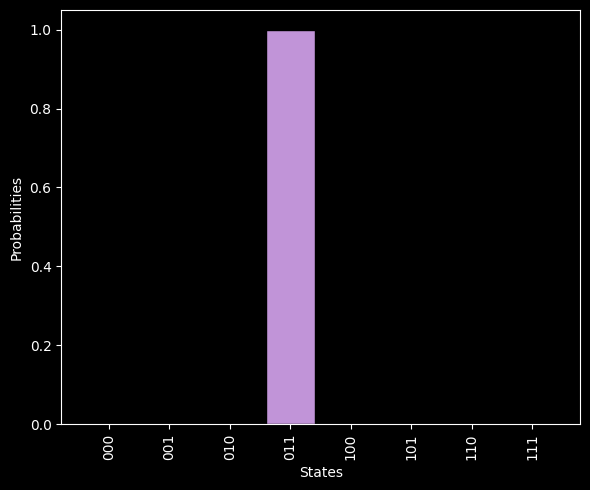

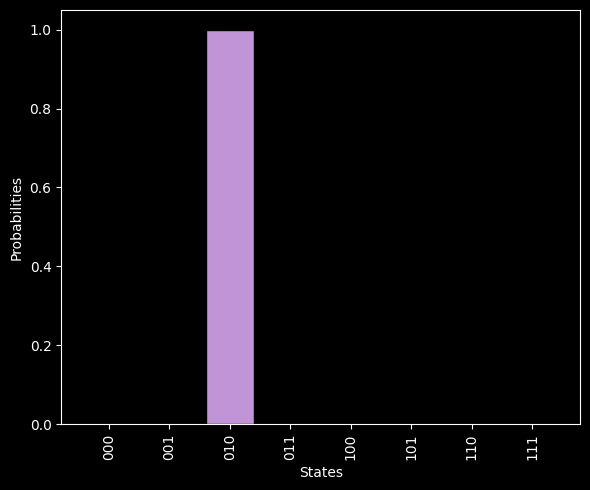

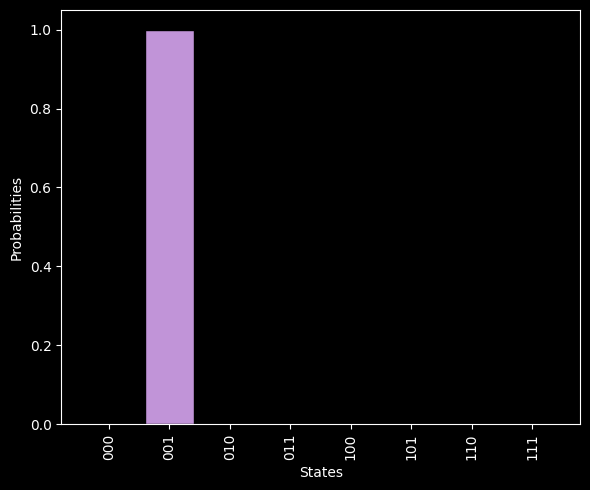

In [33]:
results = []
for i in range(3):
    print(f"### Case of single bit flip on qubit {i+1}")
    bit_flip_circ = bit_flip_circuit(error_position=i)  # Create a circuit with an error on qubit i
    results.append(bit_flip_circ.execute(initial_state=initial_state, nshots=1000))

    visualize_state(results[i])  # Visualize the final state